In [18]:
%%html
<style> table {margin-left: 0 !important;}</style>
# see https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell

# COCO Python Interface HOWTO

`pycocotools` requires **Python 3** (extension compilation)

COCO has **80** _thing_ classes.

Set    | # Images with<br>VOC Objects| Notes |
:-------|----------------------------|:-------|
train2014| 66,843 | **80K** TOTAL |
trainval35k| 28,436 | 35K TOTAL<br>In 2017, 35K moved from validation to training |

**Class name differences between VOC and COCO**

| VOC      |   COCO
|:----------|:---------
| aeroplane |    airplane
| diningtable |   dining table
| pottedplant |  potted plant
| tvmonitor   |  tv
| motobike    |  motorcycle
| sofa        |  couch



In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 15.0)  # in inches?

In [93]:
dataDir='/local/mnt/workspace/qgao/COCO'
# dataType='train2014'  # 'val2014'
dataType='val2014'
imgDir = '{}/images/{}/'.format(dataDir, dataType)
#annFile='{}/annotations/instances_{}.json'.format(dataDir,'valminusminival2014')
#annFile='{}/annotations/instances_{}.json'.format(dataDir,'minival2014')
annFile='{}/annotations/instances_{}.json'.format(dataDir,'val2014')

# annFile='{}/annotations/instances_{}.json'.format(dataDir,'train2014')

In [94]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.30s)
creating index...
index created!


In [95]:
# display COCO categories and supercategories
catIds = coco.getCatIds() # a list of IDs 1-90
cats = coco.loadCats(catIds) # a list of cats
# Each cat is a dict:
#     supercategory  vehicle
#     id             2
#     name           bicycle
#print(catIds); print(cats)

# nms=[cat['name'] for cat in cats]
# print('COCO categories: \n{}\n'.format(','.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))
d_sc = {}
for c in cats:
    sc = c['supercategory']
    if sc in d_sc:
        d_sc[sc].append(c['name'])
    else:
        d_sc[sc] = [c['name']]
        
for sc, l_c in d_sc.items():
    print("{}:".format(sc.upper()))
    print("  {}".format(','.join(l_c)))

PERSON:
  person
VEHICLE:
  bicycle,car,motorcycle,airplane,bus,train,truck,boat
OUTDOOR:
  traffic light,fire hydrant,stop sign,parking meter,bench
ANIMAL:
  bird,cat,dog,horse,sheep,cow,elephant,bear,zebra,giraffe
ACCESSORY:
  backpack,umbrella,handbag,tie,suitcase
SPORTS:
  frisbee,skis,snowboard,sports ball,kite,baseball bat,baseball glove,skateboard,surfboard,tennis racket
KITCHEN:
  bottle,wine glass,cup,fork,knife,spoon,bowl
FOOD:
  banana,apple,sandwich,orange,broccoli,carrot,hot dog,pizza,donut,cake
FURNITURE:
  chair,couch,potted plant,bed,dining table,toilet
ELECTRONIC:
  tv,laptop,mouse,remote,keyboard,cell phone
APPLIANCE:
  microwave,oven,toaster,sink,refrigerator
INDOOR:
  book,clock,vase,scissors,teddy bear,hair drier,toothbrush


In [96]:
voc_labels_in_coco = (
            'airplane',           'bicycle',
            'bird',            'boat',
            'bottle',            'bus',
            'car',            'cat',
            'chair',            'cow',
            'dining table',            'dog',
            'horse',            'motorcycle',
            'person',            'potted plant',
            'sheep',            'couch',
            'train',            'tv'
        )
voc_set = set([])
for label in voc_labels_in_coco:
    catIds = coco.getCatIds(catNms=[label]);
    imgIds = coco.getImgIds(catIds=catIds );
    #voc_set = voc_set.union(set(imgIds))
    voc_set |= set(imgIds)  # union
    print('{:14s} {}'.format(label, len(imgIds)))
print('{:14s} {}'.format('TOTAL',len(voc_set)))

airplane       840
bicycle        1114
bird           1121
boat           1048
bottle         2912
bus            1350
car            4180
cat            1480
chair          4404
cow            666
dining table   3960
dog            1521
horse          1001
motorcycle     1219
person         21634
potted plant   1540
sheep          489
couch          1448
train          1281
tv             1577
TOTAL          32467


In [97]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
#catIds = coco.getCatIds(catNms=['couch', 'chair']);
catIds = coco.getCatIds(catNms=['car']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
# print(imgIds)

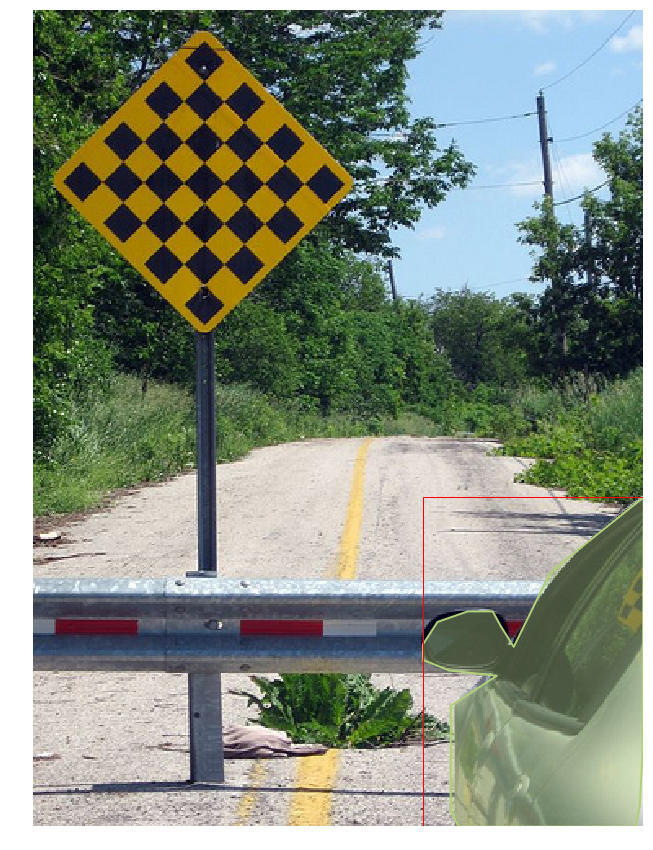

In [101]:
# randomly picked an image
imgId = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(imgId)[0] # return a list matching the imgIds provided
found = True

# tgtImgName='COCO_val2014_000000000724.jpg'
# found = False
# print('Found {} images'.format(len(imgIds)))
# for imgId in imgIds:
#     img = coco.loadImgs(imgId)[0]
#     if img['file_name'] == tgtImgName:
#         found = True
#         break

if not found:
    print(tgtImgName + ' Not found')
else:
    #for a, v in img.items(): print("{:16s} {}".format(a,v))
    #I = io.imread(img['coco_url']) # use url to load image
    I = io.imread(imgDir + img['file_name'])
    plt.axis('off')
    #fig,ax = plt.subplots(1,1)
    #ax.imshow(I) #plt.imshow(I)
    plt.imshow(I)
    #plt.show()
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds) # return a list matching the catIds provided
    coco.showAnns(anns)

    ax = plt.gca()
    for i, a in enumerate(anns):
        #for a,v in d.items(): print('  {}\n   {}'.format(a,v))
        #print(a['bbox'])
        # https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image
        # Create a Rectangle patch
        bbox = a['bbox']
        rect = patches.Rectangle(bbox[0:2],bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

Debug
```
COCO_val2014_000000000724.jpg
Bounding box for the car is way too small!
```

In [72]:
print(type(randImgId))
for i, d in enumerate(anns):
    print('ANNOTATION {}'.format(i))
    for a,v in d.items(): print('  {:12s}   {}'.format(a,v))

<class 'int'>
ANNOTATION 0
  segmentation   [[9, 59.53, 19, 46.53, 56.5, 43.53, 74, 51.53, 89.5, 43.03, 94, 36.03, 100.5, 19.03, 115, 19.03, 127.5, 18.03, 137, 0.53, 156, 0.53, 149, 19.03, 148.5, 27.03, 163.5, 41.03, 169, 59.03, 178.5, 59.03, 190.5, 66.03, 195.5, 83.03, 196.5, 98.53, 196, 113.53, 180, 120.53, 162.5, 110.53, 155.5, 88.53, 140, 67.53, 132.5, 88.03, 129, 98.53, 120, 103.03, 94.5, 100.53, 74.5, 101.53, 49.5, 102.03, 39, 108.53, 23, 108.53, 12.5, 103.03, 5, 89.53, 4, 76.53]]
  area           12022
  iscrowd        0
  image_id       456394
  bbox           [4, 0.53, 192.5, 120]
  category_id    4
  id             151275


In [26]:
import textwrap

In [55]:
#!/usr/bin/python
from __future__ import print_function

from pycocotools.coco import COCO
import textwrap
import os.path

class Coco2VocGTConveter:
    d_VocLabel2CocoLabel = {
        "aeroplane": "airplane",
        "diningtable": "dining table",
        "pottedplant": "potted plant",
        "tvmonitor": "tv",
        "motorbike": "motorcycle",
        "sofa": "couch"
    }
    d_voc_labels = {
        'aeroplane': 1, 'bicycle': 1,
        'bird': 1, 'boat': 1,
        'bottle': 1, 'bus': 1,
        'car': 1, 'cat': 1,
        'chair': 1, 'cow': 1,
        'diningtable': 1, 'dog': 1,
        'horse': 1, 'motorbike': 1,
        'person': 1, 'pottedplant': 1,
        'sheep': 1, 'sofa': 1,
        'train': 1, 'tvmonitor': 1
    }
    templateFixed = '''\
      <annotation>
        <folder>{}</folder>
        <filename>{}</filename> 
        <source>
            <database>The COCO Database</database>
            <annotation>COCO</annotation>
            <image>flickr</image>
            <flickrid>TBD</flickrid>
        </source>
        <owner>
            <flickrid>TBD</flickrid>
            <name>TBD</name>
        </owner>
        <size>
            <width>{}</width>
            <height>{}</height>
            <depth>3</depth>
        </size>
        <segmented>0</segmented>   
    '''  # folder filename, width, height
    templateObj = '''\
        <object>
            <name>{}</name>
            <pose>Left</pose>
            <truncated>1</truncated>
            <difficult>0</difficult>
            <bndbox>
                <xmin>{}</xmin>
                <ymin>{}</ymin>
                <xmax>{}</xmax>
                <ymax>{}</ymax>
            </bndbox>
        </object>    
    '''  # name xmin ymin xmax ymax

    def __init__(self):
        self.d_CocoLabel2VocLabel = {}
        for k, v in Coco2VocGTConveter.d_VocLabel2CocoLabel.items():
            self.d_CocoLabel2VocLabel[v] = k

    def ConvertFile(self, cocoJsonFile, vocXmlDir, imgListFile):
        # load Json
        coco_gt = COCO(cocoJsonFile)

        catIds = coco_gt.getCatIds()  # a list of IDs 1-90
        cats = coco_gt.loadCats(catIds)  # a list of cats
        # Each cat is a dict:
        #     supercategory  vehicle
        #     id             2
        #     name           bicycle
        self.d_catId2Name = {}
        for c in cats:
            self.d_catId2Name[c['id']] = c['name']

        d_includedImgNms = {}
        numXmlFiles = 0
        self.numIsCrowd = 0
        for vocCatNms in Coco2VocGTConveter.d_voc_labels.keys():
            if vocCatNms in Coco2VocGTConveter.d_VocLabel2CocoLabel:
                cocoCatNms = Coco2VocGTConveter.d_VocLabel2CocoLabel[vocCatNms]
            else:
                cocoCatNms = vocCatNms

            catIds = coco_gt.getCatIds(catNms=[cocoCatNms]);
            imgIds = coco_gt.getImgIds(catIds=catIds);

            imgInfos = coco_gt.loadImgs(imgIds)  # return a list matching the imgIds provided

            for ii in imgInfos:
                #annIds = coco_gt.getAnnIds(imgIds=ii['id'], iscrowd=False)  # catIds=catIds,
                annIds = coco_gt.getAnnIds(imgIds=ii['id'], iscrowd=None)  # catIds=catIds,
                anns = coco_gt.loadAnns(annIds)  # return a list
                imgFileNm = ii['file_name']
                if imgFileNm in d_includedImgNms:  continue

                vocXml = self.PerImgConvert(ii, anns)
                if vocXml is None:  continue
                d_includedImgNms[imgFileNm] = True
                xmlFileNm = vocXmlDir + '/' +  os.path.splitext(imgFileNm)[0] + '.xml'
                print("{} => {}".format(imgFileNm, xmlFileNm))
                try:
                    with open(xmlFileNm, 'w') as f:
                        f.write(vocXml)
                    numXmlFiles+= 1
                except IOError:
                    print('Failed to open {} for writing'.format(numXmlFiles))

        with open(imgListFile, 'w') as f:
            for k in sorted(d_includedImgNms.keys()):
                f.write(os.path.splitext(imgFileNm)[0] + '\n')
        print('Total {} VOC XML files are generated: numIsCrowd={}'.format(numXmlFiles, self.numIsCrowd))
    def PerImgConvert(self, cocoImgInfo, cocoAnno):
        '''
        cocoImgInfo:
        ------------
        license          1
        url              http://farm3.staticflickr.com/2510/4227189174_b89c0a56d6_z.jpg
        file_name        COCO_val2014_000000240434.jpg
        height           427
        width            640
        date_captured    2013-11-22 01:04:35
        id               240434

        cocoAnno is a list of annotations with each element like below:
        -----------
        segmentation   [[333.98, 253.95, 361.48, 255.05, 364.23]]
        area           947.61635
        iscrowd        0
        image_id       240434
        bbox           [332.61, 223.7, 31.62, 31.35]
        category_id    72
        id             28385
        '''

        xmlObj = ''
        for a in cocoAnno:
            catNm = self.d_catId2Name[a['category_id']]
            if catNm in self.d_CocoLabel2VocLabel:
                vocCatNm = self.d_CocoLabel2VocLabel[catNm]
            else:
                vocCatNm = catNm
            if vocCatNm not in Coco2VocGTConveter.d_voc_labels:
                continue
            if a['iscrowd']:
                self.numIsCrowd += 1
                continue
            xmin = float(a['bbox'][0])
            ymin = float(a['bbox'][1])
            xmax = float(a['bbox'][2]) + xmin
            ymax = float(a['bbox'][3]) + ymin
            xmlObj += Coco2VocGTConveter.templateObj.format(
                vocCatNm,
                int(xmin + 0.5), int(ymin + 0.5), int(xmax + 0.5), int(ymax + 0.5)
            )
        if xmlObj == '':
            return None
        xmlFixed = Coco2VocGTConveter.templateFixed.format('COCO35k',  # folder
                                                           cocoImgInfo['file_name'],  # image file name
                                                           cocoImgInfo['width'],  # image width
                                                           cocoImgInfo['height']  # image height
                                                           )

        return textwrap.dedent(xmlFixed + xmlObj) + '</annotation>\n'

if __name__ == '__main__':
    #cocoGtFile = '/local/mnt/workspace/qgao/COCO/annotations/instances_minival2014.json'
    cocoGtFile = '/local/mnt/workspace/qgao/COCO/annotations/instances_valminusminival2014.json'
    c = Coco2VocGTConveter()
    c.ConvertFile(cocoGtFile, '/local/mnt/workspace/qgao/VOCData/VOCdevkit/COCO_val2014/Annotations',
                  '/local/mnt/workspace/qgao/VOCData/VOCdevkit/COCO_val2014/ImageSets/Main/valminusminival2014.txt'
    )

In [56]:
c = Coco2VocGTConveter()
c.ConvertFile(annFile, '')

loading annotations into memory...
Done (t=2.75s)
creating index...
index created!
<annotation>
  <folder>COCO35k</folder>
  <filename>COCO_val2014_000000081922.jpg</filename> 
  <source>
      <database>The COCO Database</database>
      <annotation>COCO</annotation>
      <image>flickr</image>
      <flickrid>TBD</flickrid>
  </source>
  <owner>
      <flickrid>TBD</flickrid>
      <name>TBD</name>
  </owner>
  <size>
      <width>640</width>
      <height>426</height>
      <depth>3</depth>
  </size>
  <segmented>0</segmented>   
      <object>
      <name>car</name>
      <pose>Left</pose>
      <truncated>1</truncated>
      <difficult>0</difficult>
      <bndbox>
          <xmin>172</xmin>
          <ymin>361</ymin>
          <xmax>212</xmax>
          <ymax>407</ymax>
      </bndbox>
  </object>    
      <object>
      <name>car</name>
      <pose>Left</pose>
      <truncated>1</truncated>
      <difficult>0</difficult>
      <bndbox>
          <xmin>200</xmin>
          <ymin>

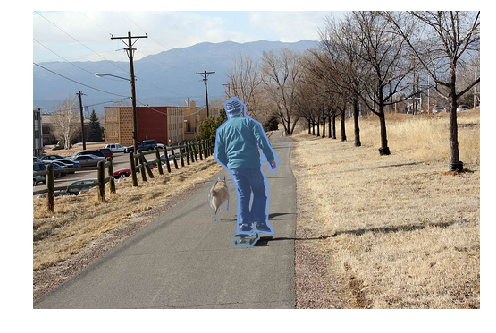

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


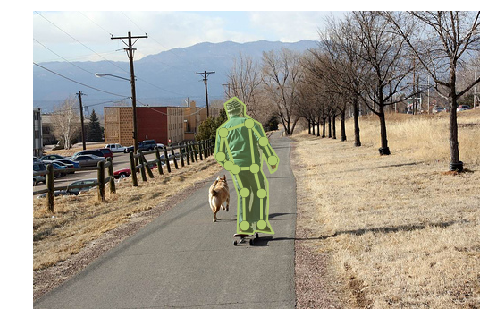

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


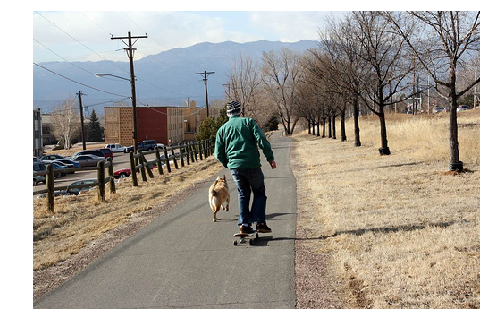

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()